In [64]:
import torch
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'

In [65]:
loads = torch.load("./data/Pecan Street Smart Meter Data/loads_raw.pt")


/tmp/ipykernel_249930/2711518053.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loads = torch.load("./data/Pecan Street Smart Meter Data/loads_raw.pt")


In [66]:
model1 = "diff_base"
model2 = "diff_phy_80000"
checkpoint1 = torch.load('./result/models/{}.pth'.format(model1))
checkpoint2 = torch.load('./result/models/{}.pth'.format(model2))

/tmp/ipykernel_249930/2805012724.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint1 = torch.load('./result/models/{}.pth'.format(model1))
/tmp/ipykernel_249930/

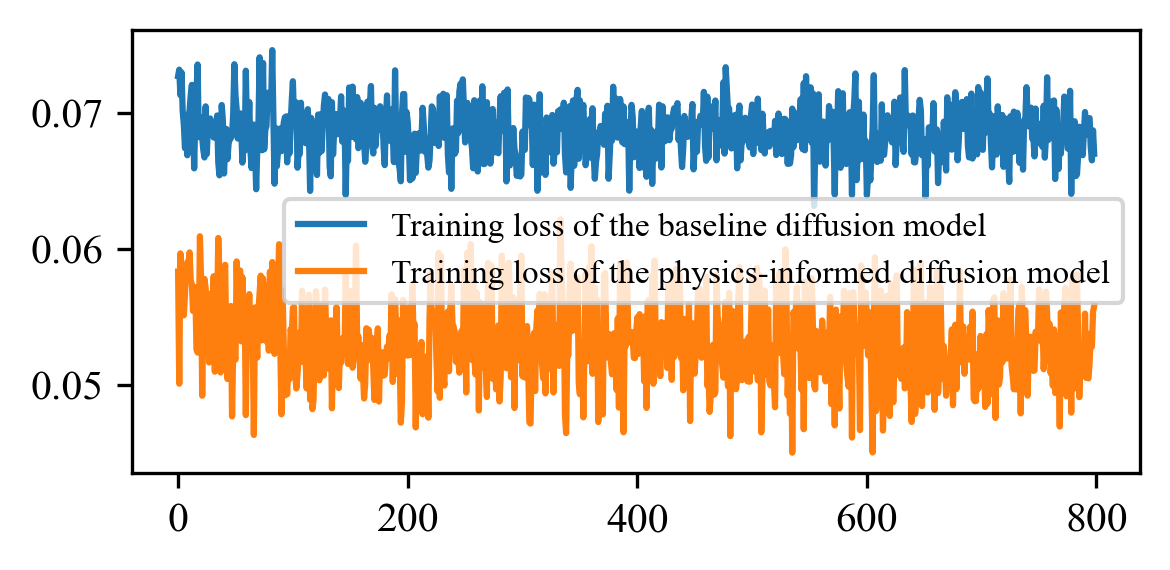

In [67]:
plt.figure(figsize=(4,2), dpi=300)
plt.plot(checkpoint1["Loss"][1:], label = "Training loss of the baseline diffusion model")
plt.plot(checkpoint2["Loss"][1:], label = "Training loss of the physics-informed diffusion model")
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig("./result/plots/loss.jpg")

In [68]:
loads.shape

torch.Size([25, 365, 96])

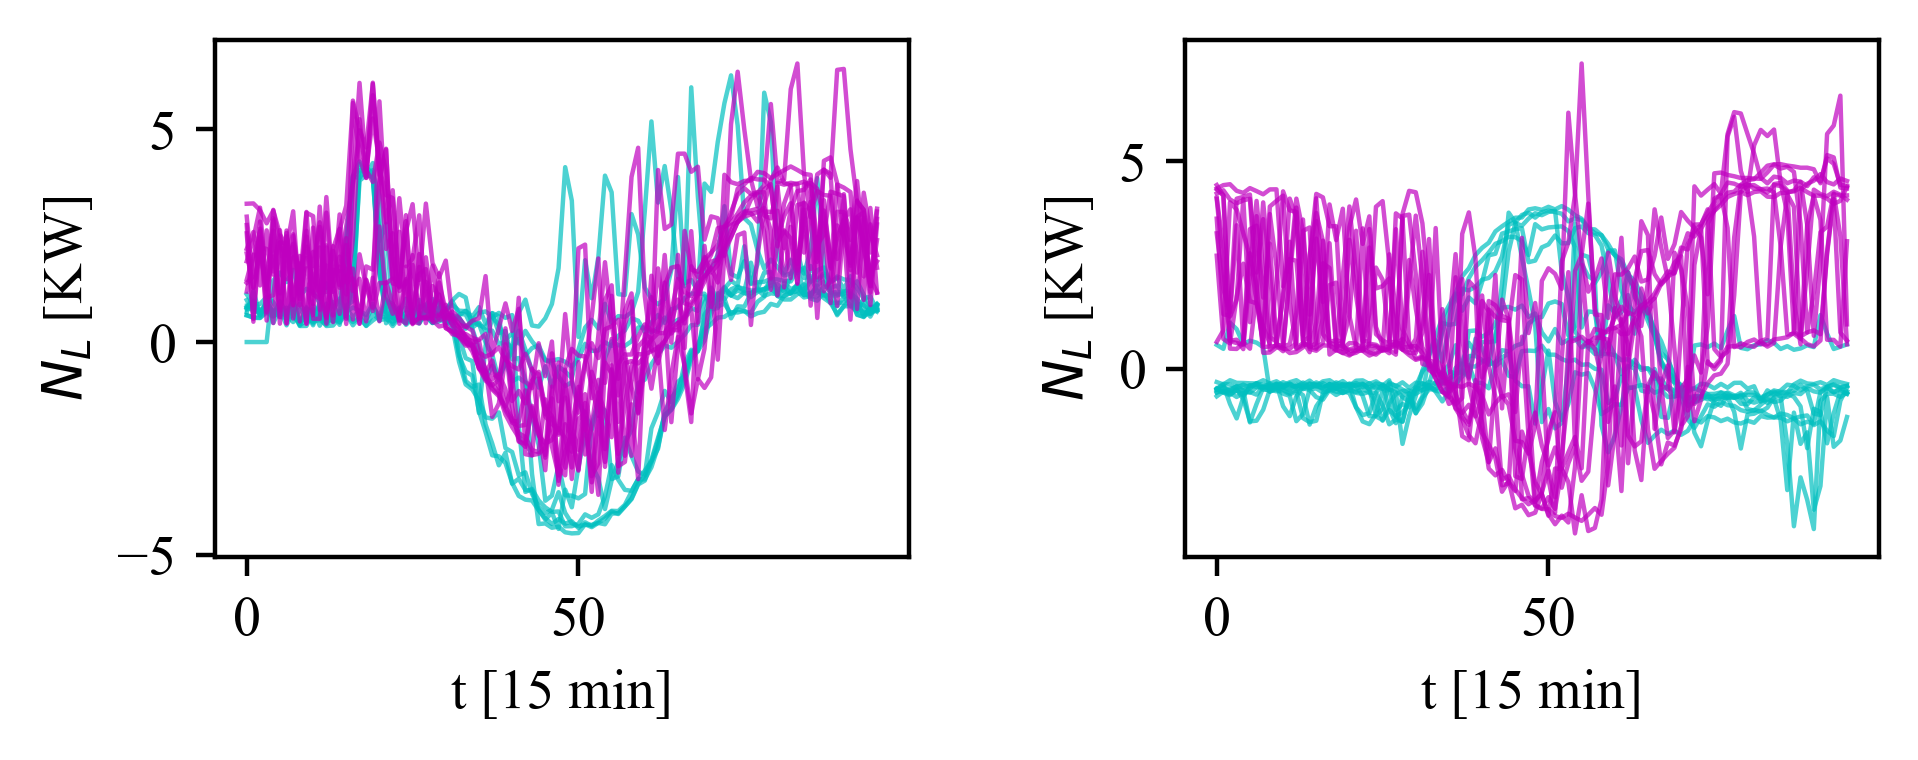

In [70]:
plt.figure(figsize=(5, 2), dpi=400)
fontsize = 10
import numpy as np
# colors = plt.cm.viridis(np.linspace(0, 1, 365))  # Using 'viridis' colormap
selected_days = np.linspace(0, 364, 12, dtype=int)
colors = plt.cm.hsv(np.linspace(0, 1, 365))

plt.subplot(1,2,1)
for i in range(10):
    plt.plot(loads[0][i],color = 'c', linewidth=0.8, alpha=0.7)

for i in range(10):
    i = i+210
    plt.plot(loads[0][i], color = 'm', linewidth=.8, alpha=0.7)

plt.xlabel("t [15 min]", fontsize=fontsize)
plt.ylabel("$N_L$ [KW]", fontsize=fontsize)
plt.subplot(1,2,2)
for i in range(10):
    plt.plot(loads[3][i], color = 'c', linewidth=0.8, alpha=0.7)

for i in range(10):
    i = i+210
    plt.plot(loads[3][i], color = 'm', linewidth=.8, alpha=0.7)
plt.xlabel("t [15 min]", fontsize=fontsize)
plt.ylabel("$N_L$ [KW]", fontsize=fontsize)
# plt.subplot(2,2,3)
# for i in range(59):
#     plt.plot(loads[2][i])
# plt.xlabel("t [15 min]", fontsize=fontsize)
# plt.ylabel("NL [KW]", fontsize=fontsize)
# plt.subplot(2,2,4)
# for i in range(59):
#     plt.plot(loads[3][i])
# plt.xlabel("t [15 min]", fontsize=fontsize)
# plt.ylabel("NL [KW]", fontsize=fontsize)
plt.tight_layout()


plt.savefig("./result/plots/load_comp.jpg", dpi=400)

In [ ]:
k = 26
cond = torch.load("./data/Pecan Street Smart Meter Data/cond_test.pt")[k].unsqueeze(0)
PV_base = torch.load("./data/Pecan Street Smart Meter Data/PV_base_test.pt")[k].unsqueeze(0)
checkpoint = torch.load('./result/models/diff_phy.pth')
def get_x_hat(checkpoint, cond, PV_base = None):
    ddpm = checkpoint['ddpm']
    device = ddpm.device
    cond = cond.to(device)
    if PV_base is not None:
        PV_base = PV_base.to(device)
    X_test_hat = ddpm.sample_seq(batch_size=len(cond), cond=cond, PV_base = PV_base)
    return X_test_hat.to("cpu")

In [ ]:
x_hat = get_x_hat(checkpoint, cond, PV_base).squeeze(1)

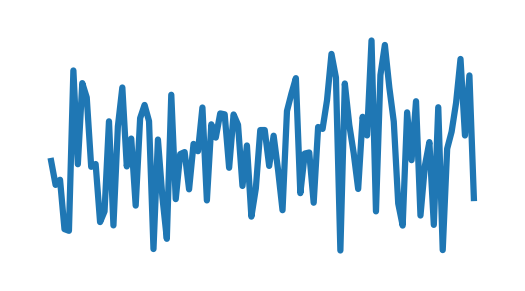

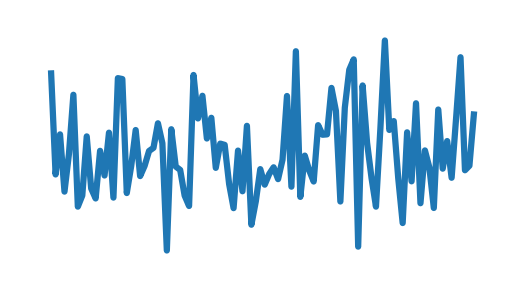

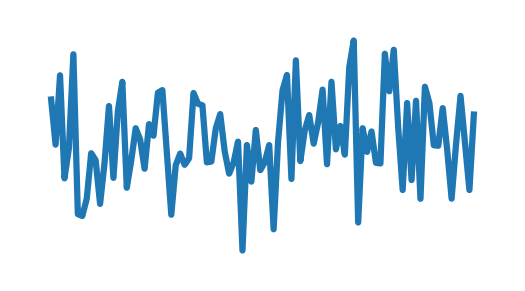

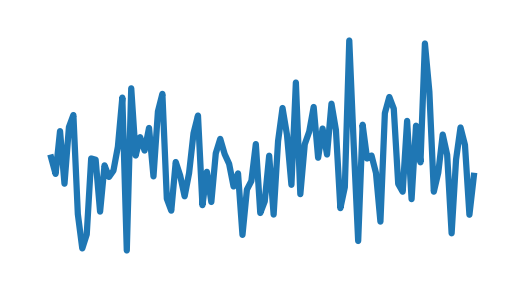

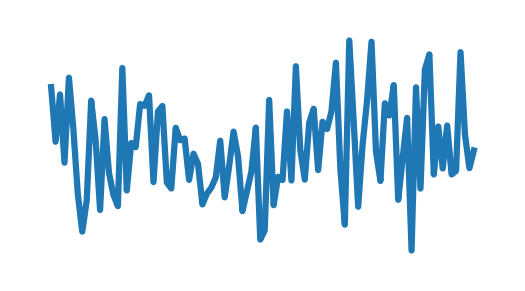

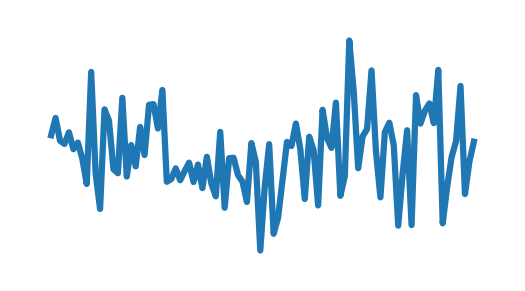

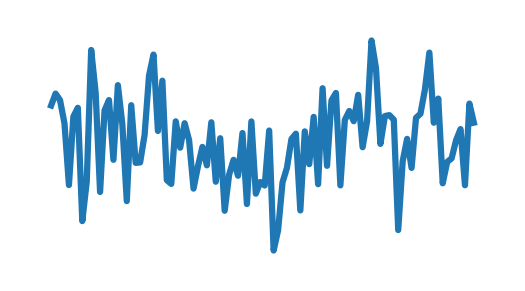

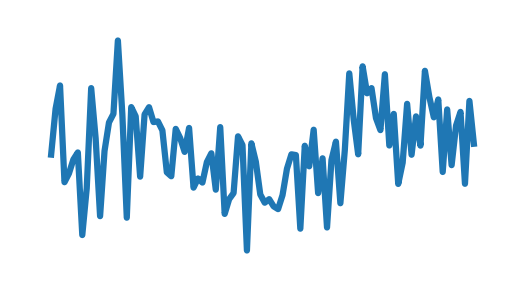

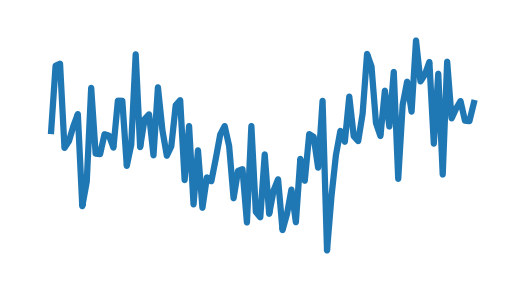

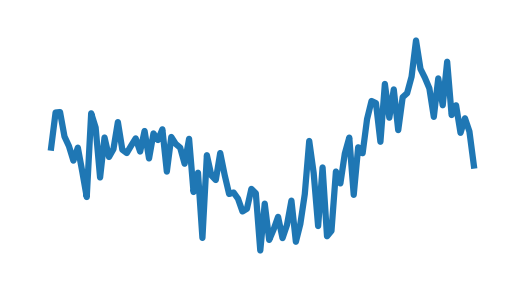

In [ ]:
# plt.figure(figsize=(10, 3), dpi=300)
for i in range(10):
    # plt.subplot(2, 5, i+1)
    plt.figure(figsize=(2, 1), dpi=300)
    plt.plot(x_hat[i*50 +50 - 1])
    # Remove axes ticks and labels
    plt.xticks([])  # Removes x-axis indices
    plt.yticks([])  # Removes y-axis indices

    # To also remove the spine (the box around the plot)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.savefig("./result/plots/gen_pro_{}".format(i*50 +50))
        # plt.title("Step {}".format(i*50 +50))
# plt.tight_layout()